In [2]:
import pandas as pd;
df=pd.read_csv(r"C:\Users\NITI\OneDrive\Desktop\Niti AICTE\Salary_Data.csv")
df
df.head()
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [5]:
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              193
Years of Experience     37
Salary                 444
dtype: int64

In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Job Title']=le.fit_transform(df['Job Title'])
df['Education Level']=le.fit_transform(df['Education Level'])

In [8]:
df = df.dropna(subset=['Salary'])

In [13]:
from sklearn.impute import SimpleImputer

X = df.drop('Salary', axis=1)   # Input features
y = df['Salary']                # Target variable

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Fill missing values in y_train using mean
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
import numpy as np
print("X_train NaN:", np.isnan(X_train).sum())
print("X_test NaN:", np.isnan(X_test).sum())
print("y_train NaN:", np.isnan(y_train).sum())
print("y_test NaN:", np.isnan(y_test).sum())

In [ ]:
# Combine X_test and y_test temporarily for easy cleaning
import pandas as pd

X_test_df = pd.DataFrame(X_test)
y_test_df = pd.Series(y_test).reset_index(drop=True)

# Combine into one dataframe
test_df = pd.concat([X_test_df, y_test_df], axis=1)

# Remove rows where y_test is NaN
test_df_cleaned = test_df.dropna()

# Split back X and y
X_test_cleaned = test_df_cleaned.iloc[:, :-1].values
y_test_cleaned = test_df_cleaned.iloc[:, -1].values

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Convert X_test and y_test to pandas objects
X_test_df = pd.DataFrame(X_test)
y_test_series = pd.Series(y_test, index=X_test_df.index)

# Step 2: Drop rows with NaNs from X_test_df
X_test_cleaned = X_test_df.dropna()
y_test_cleaned = y_test_series[X_test_cleaned.index]



In [14]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined and cleaned
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Start with original DataFrame
df = pd.read_csv(r"C:\Users\NITI\OneDrive\Desktop\Niti AICTE\Salary_Data.csv")  # replace with your actual file or use df if already defined

# Step 2: Separate features and target
X = df.drop("Salary", axis=1)
y = df["Salary"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Remove NaNs from X_test and align y_test
X_test_cleaned = X_test.dropna()
y_test_cleaned = y_test.loc[X_test_cleaned.index]


In [33]:
import pandas as pd

# Convert categorical columns into numeric (One-Hot Encoding)
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Match columns (very important)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [38]:
X_train_encoded = X_train_encoded.fillna(X_train_encoded.mean())

In [40]:
import numpy as np
y_train = pd.Series(y_train).fillna(np.mean(y_train))

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [43]:
from sklearn.impute import SimpleImputer

# Step 1: Handle NaNs in X_test_encoded using SimpleImputer
imputer = SimpleImputer(strategy='mean')   # You can also use 'median' or 'most_frequent'
X_test_imputed = imputer.fit_transform(X_test_encoded)

# Step 2: Predict using the model on imputed data
y_pred = model.predict(X_test_imputed)


C:\Users\NITI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)


In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)


In [47]:
import numpy as np
from sklearn.metrics import r2_score

# Step 1: Convert both to numpy arrays
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Step 2: Remove rows where either y_test or y_pred is NaN
valid_mask = ~np.isnan(y_test_array) & ~np.isnan(y_pred_array)

# Step 3: Apply mask and calculate R²
r2 = r2_score(y_test_array[valid_mask], y_pred_array[valid_mask])

print("R² Score:", r2)



R² Score: 0.8820026283167073


In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\NITI\OneDrive\Desktop\Niti AICTE\Salary_Data.csv")  

# Step 1: Separate input (X) and output (y)
X = df.drop("Salary", axis=1)   # Salary is your target
y = df["Salary"]

# Step 2: Convert categorical columns into numeric using One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)



In [11]:
X_encoded = X_encoded.fillna(X_encoded.mean(numeric_only=True))  # Numeric columns
X_encoded = X_encoded.ffill()  # Categorical columns


In [14]:
import pandas as pd

# Step 1: Load data
data = pd.read_csv(r"C:\Users\NITI\OneDrive\Desktop\Niti AICTE\Salary_Data.csv")  

# Step 2: Check all columns to identify the target column
print("Columns in dataset:", data.columns)

# Step 3: Show few rows to manually check target
print("\nSample rows:\n", data.head())



Columns in dataset: Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

Sample rows:
     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  



Mean Squared Error: 345794236.18
R2 Score: 0.88


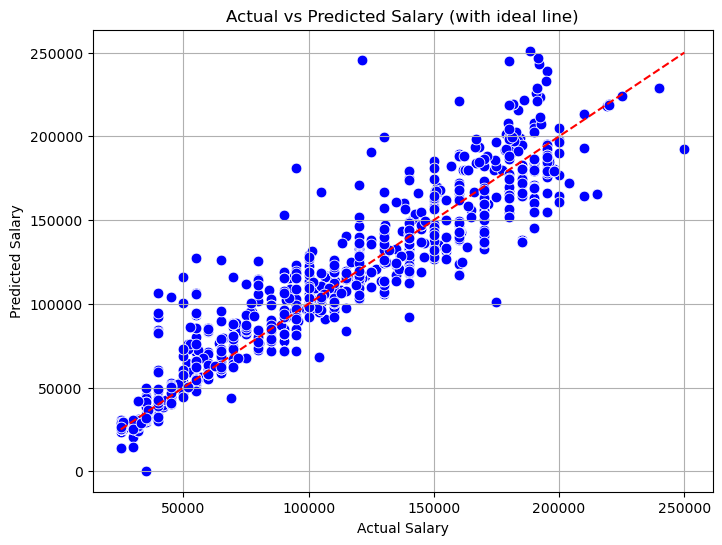

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load data
data = pd.read_csv(r"C:\Users\NITI\OneDrive\Desktop\Niti AICTE\Salary_Data.csv")

# 2. Remove rows where 'Salary' is NaN
data = data.dropna(subset=['Salary'])

# 3. Create features (X) and target (y)
X = data.drop('Salary', axis=1)
y = data['Salary']

# 4. One-hot encode categorical variables (like Gender, Education Level, Job Title)
X_encoded = pd.get_dummies(X)

# 5. Handle any NaN in X (if any)
X_encoded = X_encoded.ffill()  # Forward fill

# 6. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 7. Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Predict
y_pred = model.predict(X_test)

# 9. Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (with ideal line)")
plt.grid(True)
plt.show()


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict values using trained model
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 13134.84
Mean Squared Error (MSE): 345794236.18
R² Score: 0.88


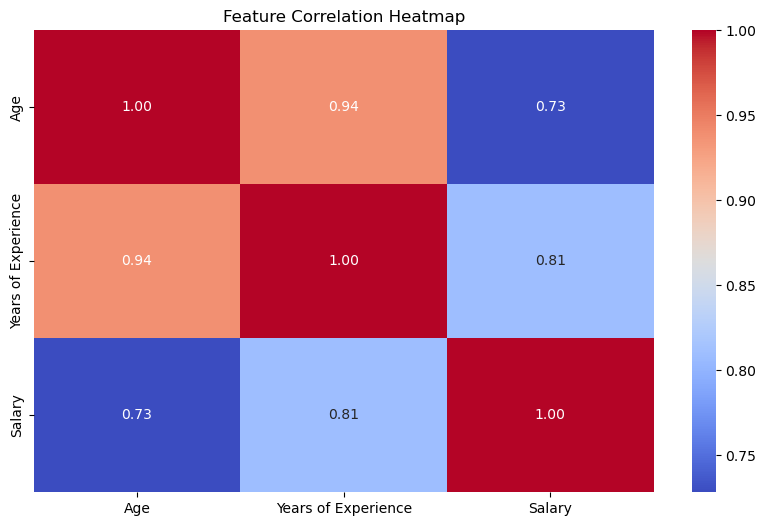

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


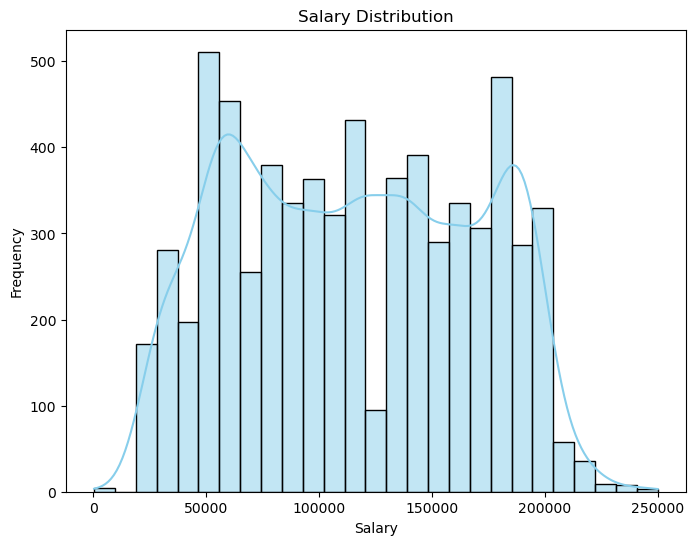

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(data['Salary'], kde=True, color='skyblue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()


In [24]:
import pickle

# Trained model ko save karo
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
